In [ ]:
!pip install ever-beta==0.2.3
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 2.9 MB/s eta 0:00:00
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-hnbzq1fr
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-hnbzq1fr
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit e848409ff5004c62013573b4c69feb76db413e51
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for segmentation_models_pytorch: filename=segmentation_models_pytorch-0.5.1.dev0-py3-none-any.whl size=155865 sha256=e53ead0334926e7178b7bb1fcb750a1ac8600ca30555cf876e89388fddc0dd2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-n1tj7wd7/wheels/ef/38/4b/267c9bdb27c85ebaa11e9ec77c9059cf2c166ceee760f24429
Successfully built segmentation_models_pytorch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive/LoveDA ./LoveDA

In [ ]:
%cd ./LoveDA

/content/drive/MyDrive/LoveDA


In [ ]:
!cat ./train.py

import ever as er
import torch
import numpy as np
import os
from data.loveda import COLOR_MAP
from tqdm import tqdm
import random
from module.tta import tta, Scale
from module.viz import VisualizeSegmm

er.registry.register_all()


def evaluate_cls_fn(self, test_dataloader, config=None):
    self.model.eval()
    model_to_use = getattr(self.model, 'module', self.model)  # <-- CORRECCIÓN
    classes = model_to_use.config.classes if model_to_use.config.classes != 1 else 2
    metric_op = er.metric.PixelMetric(classes, logdir=self._model_dir, logger=self.logger)

    vis_dir = os.path.join(self._model_dir, f'vis-{self.checkpoint.global_step}')

    palette = np.array(list(COLOR_MAP.values())).reshape(-1).tolist()
    viz_op = VisualizeSegmm(vis_dir, palette)

    with torch.no_grad():
        for img, gt in tqdm(test_dataloader):
            img = img.to(torch.device('cuda'))
            y_true = gt['cls'].cpu()
            
            if config.get('tta', False):
                pred = 

In [ ]:
import ever as er
print(er.trainer.TRAINER.keys())

dict_keys(['th_ddp', 'dp', 'base'])


In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/LoveDA')

import ever as er

In [ ]:
!bash ./scripts/train_hrnetw32.sh

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:ever.core.logger:HRNetEncoder: pretrained = True
2025-12-04 22:23:30.063656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764887010.093160    3056 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764887010.101637    3056 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764887010.122622    3056 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764887010.122647    3056 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same targ

In [ ]:
!cp /usr/local/lib/python3.12/dist-packages/ever/core/launcher.py /content/launcher.py

In [ ]:
import shutil

# Ruta del archivo corregido que subiste
corrected_path = '/content/launcher1.py'

# Ruta del archivo original en la instalación de Ever
original_path = '/usr/local/lib/python3.12/dist-packages/ever/core/launcher.py'

# Reemplazar
shutil.copyfile(corrected_path, original_path)

print("Archivo launcher.py reemplazado correctamente.")


Archivo launcher.py reemplazado correctamente.


In [ ]:
!bash ./scripts/eval_hrnetw32.sh

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:data.loveda:./LoveDA/Val/images_png -- Dataset images: 245
INFO:ever.core.logger:HRNetEncoder: pretrained = True
100% 61/61 [00:11<00:00,  5.19it/s]
INFO:__main__:
+-------+---------+---------+-----------+---------+
| class |   iou   |    f1   | precision |  recall |
+-------+---------+---------+-----------+---------+
|   0   | 0.15598 | 0.26986 |  0.41346  |  0.2003 |
|   1   | 0.60366 | 0.75285 |  0.71497  | 0.79497 |
|   2   | 0.44213 | 0.61316 |  0.52978  |  0.7277 |
|   3   |  0.7216 | 0.83829 |  0.83437  | 0.84225 |
|   4   | 0.16854 | 0.28846 |  0.87913  | 0.17254 |
|   5   |   0.0   |   0.0   |    0.0    |   0.0   |
|   6   |   0.0   |   0.0   |    0.0    |   0.0   |
|  mean | 0.29884 | 0.39466 |  0.48167  | 0.39111 |
|   OA  | 0.73482 |    -    |     -     |    -    |
| Kappa | 0.59934 |    -    |     -     |    -    |
+-------+---------+---------+-----------+---------+


In [ ]:
!bash ./scripts/predict_test.sh

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
Load model!
INFO:data.loveda:./LoveDA/Val/images_png -- Dataset images: 245
INFO:ever.core.logger:HRNetEncoder: pretrained = True
100% 61/61 [00:10<00:00,  5.65it/s]


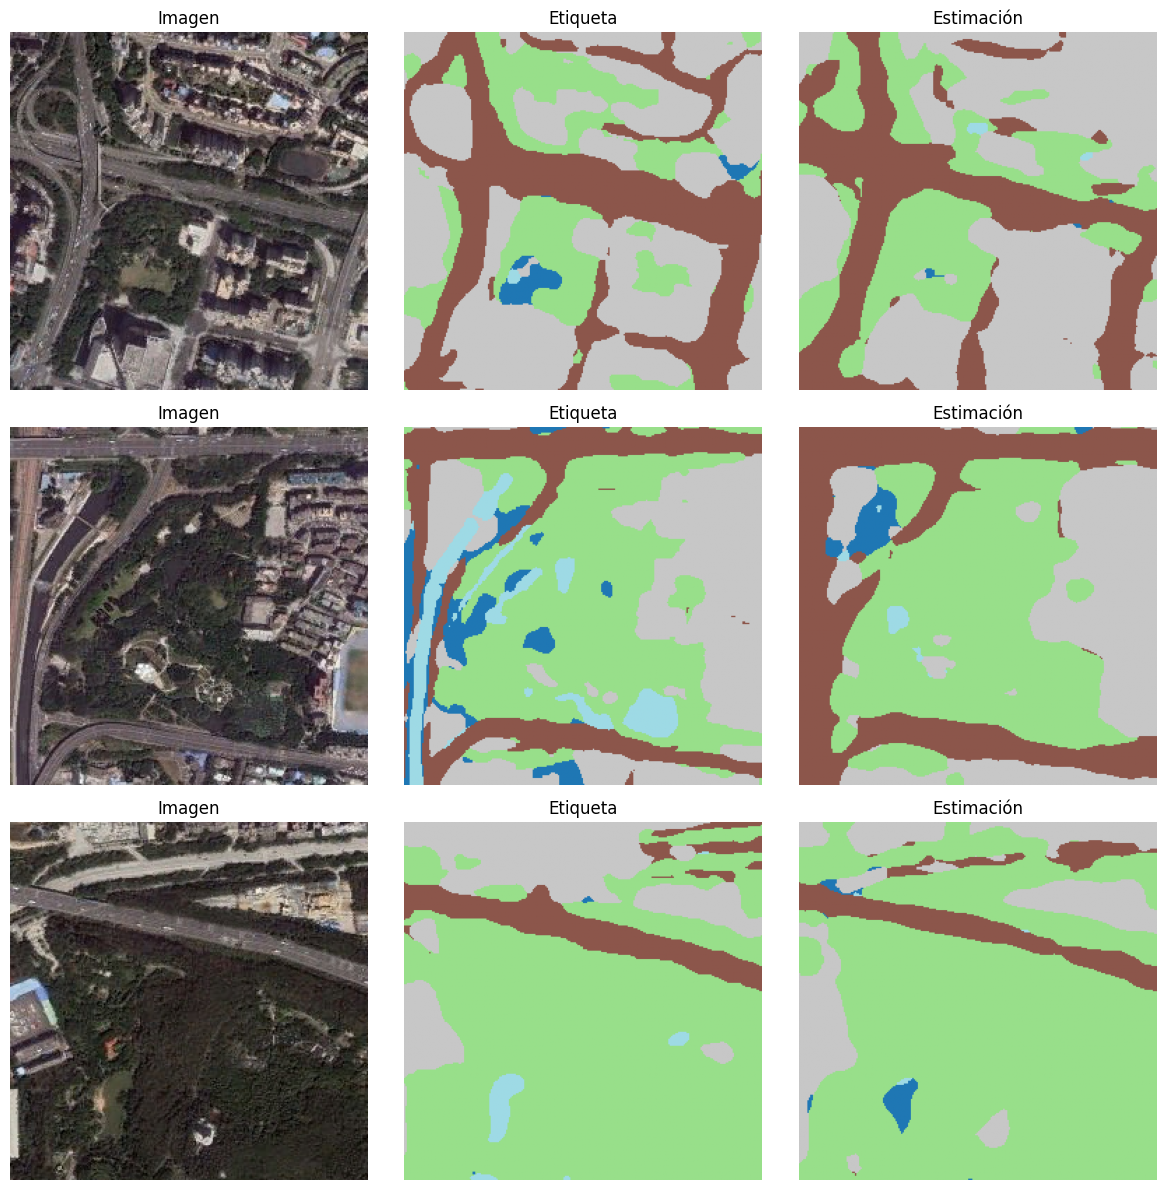

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

# Rutas
sat_images = [
    './LoveDA/Val/images_png/10.png',
    './LoveDA/Val/images_png/2.png',
    './LoveDA/Val/images_png/35.png'
]

label_images = [
    './LoveDA/Val/masks_png/10.png',
    './LoveDA/Val/masks_png/2.png',
    './LoveDA/Val/masks_png/35.png'
]

pred_images = [
    './out/10.png',
    './out/2.png',
    './out/35.png'
]

# Crear figura
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i in range(3):
    # Leer imágenes
    sat = imread(sat_images[i])
    label = imread(label_images[i])
    pred = imread(pred_images[i])

    # Mostrar satélite
    axes[i, 0].imshow(sat)
    axes[i, 0].set_title('Imagen')
    axes[i, 0].axis('off')

    # Mostrar label
    axes[i, 1].imshow(label, cmap='tab20')
    axes[i, 1].set_title('Etiqueta')
    axes[i, 1].axis('off')

    # Mostrar predicción
    axes[i, 2].imshow(pred, cmap='tab20')
    axes[i, 2].set_title('Estimación')
    axes[i, 2].axis('off')


plt.tight_layout()
plt.show()


In [ ]:
# Ruta al archivo
cm_path = '/content/LoveDA/log/normal_baseline/hrnetw32/confusion_matrix-1764893526.3777275.npy'

# Carga matriz
cm = np.load(cm_path)
print("Forma de la matriz:", cm.shape)
print(cm)

Forma de la matriz: (7, 7)
[[2.024520e+05 4.779970e+05 9.031000e+04 2.337860e+05 6.223000e+03
  0.000000e+00 0.000000e+00]
 [3.241800e+04 3.769711e+06 3.610790e+05 5.659580e+05 1.279400e+04
  0.000000e+00 0.000000e+00]
 [1.087200e+04 1.408940e+05 1.329777e+06 3.444560e+05 1.373000e+03
  0.000000e+00 0.000000e+00]
 [7.325900e+04 4.503050e+05 6.514330e+05 6.284753e+06 2.117000e+03
  0.000000e+00 0.000000e+00]
 [1.706510e+05 4.336240e+05 7.746400e+04 1.033730e+05 1.637050e+05
  0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00]]


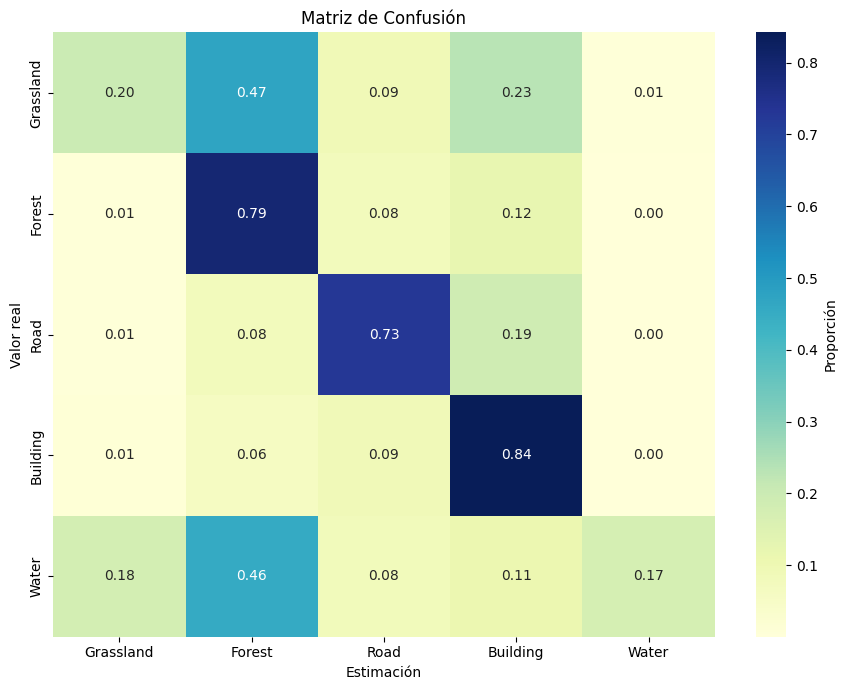

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz original
cm = np.array([[2.024520e+05, 4.779970e+05, 9.031000e+04, 2.337860e+05, 6.223000e+03],
 [3.241800e+04, 3.769711e+06, 3.610790e+05, 5.659580e+05, 1.279400e+04],
 [1.087200e+04, 1.408940e+05, 1.329777e+06, 3.444560e+05, 1.373000e+03],
 [7.325900e+04, 4.503050e+05, 6.514330e+05, 6.284753e+06, 2.117000e+03],
 [1.706510e+05, 4.336240e+05, 7.746400e+04, 1.033730e+05, 1.637050e+05]])

# Normalización por filas
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# Etiquetas
labels = ["Grassland", "Forest", "Road", "Building", "Water"]

# Gráfica
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_norm,
    annot=True, fmt=".2f", cmap="YlGnBu",
    xticklabels=labels, yticklabels=labels,
    cbar_kws={'label': 'Proporción'}
)

plt.title("Matriz de Confusión")
plt.xlabel("Estimación")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()